Null Values per Column:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Number of Duplicate Rows: 0

Unique Customers: 199
Unique Products: 100

Incorrect Transactions (where TotalValue ≠ Quantity * Price):
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
17         T00270      C0101      P034 2024-11-07 02:48:08         3   
29         T00218      C0148      P057 2024-01-17 19:40:55         3   
30         T00417      C0035      P057 2024-04-20 22:54:54         3   
31         T00492      C0120      P057 2024-08-08 05:40:02         3   
35         T00703      C0092      P057 2024-02-04 00:31:54         3   
..            ...        ...       ...                 ...       ...   
924        T00823      C0095      P079 2024-09-30 10:45:06         3   
935        T00660      C0057      P008 2024-09-23 16:46:01         3   
946        T00646      C0036    

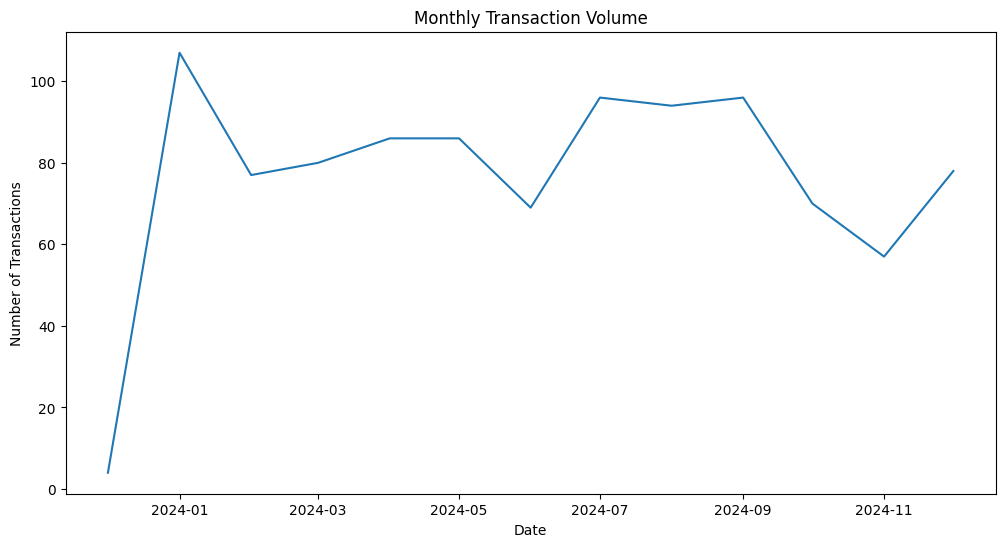

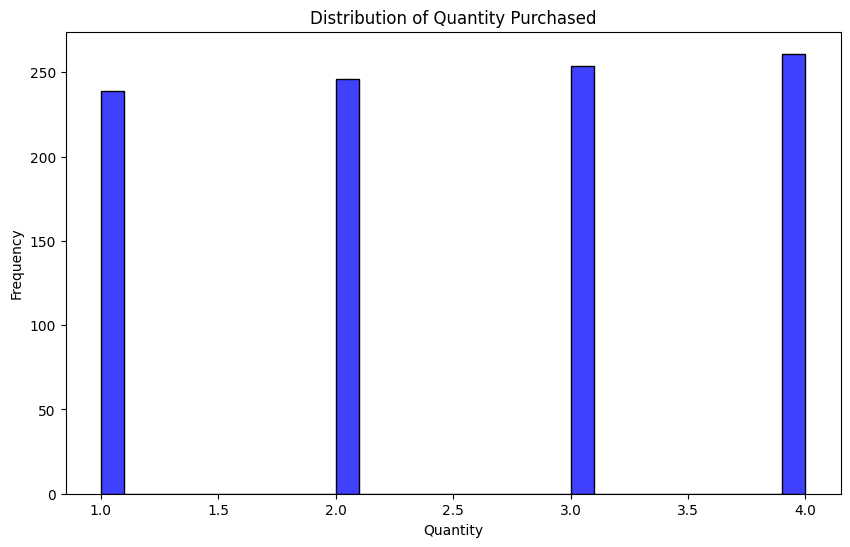

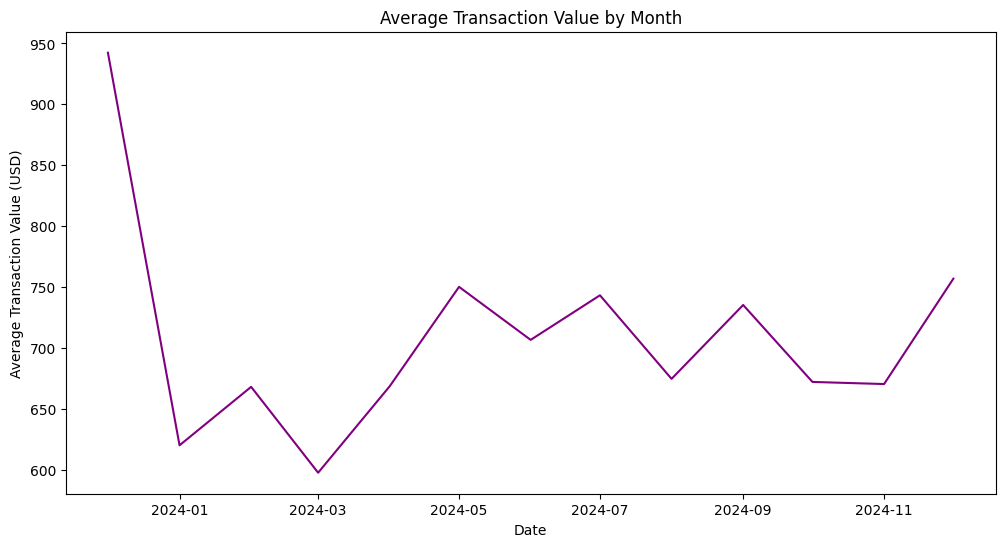

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset of transactions
file_path = "D:/zeotap/Transactions - Transactions.csv"  
df = pd.read_csv(file_path)

# Check for Null Values and Duplicate values
print("Null Values per Column:")
print(df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Data Cleaning Process
if df.isnull().sum().any():
    print("\nHandling Missing Values...")
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)  
        else:
            df[col].fillna(df[col].mean(), inplace=True)  

# Convert 'TransactionDate' to Datetime for Analysis
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Add Year and Month Columns for Time-based Analysis
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Check for Unique Values
print("\nUnique Customers:", df['CustomerID'].nunique())
print("Unique Products:", df['ProductID'].nunique())

# Calculate Missing or Incorrect TotalValue
df['CalculatedValue'] = df['Quantity'] * df['Price']
incorrect_transactions = df[df['TotalValue'] != df['CalculatedValue']]
print("\nIncorrect Transactions (where TotalValue ≠ Quantity * Price):")
print(incorrect_transactions)

# Visualizations

# 1. Monthly Transaction Volume
monthly_transactions = df.groupby(['TransactionYear', 'TransactionMonth']).size().reset_index(name='TransactionCount')
monthly_transactions['TransactionDate'] = pd.to_datetime(monthly_transactions['TransactionYear'].astype(str) + '-' + monthly_transactions['TransactionMonth'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionCount', data=monthly_transactions)
plt.title("Monthly Transaction Volume")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

# 2. Quantity Purchased Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=False, bins=30, color='blue')
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# 3. Average Transaction Value by Month
avg_transaction_value = df.groupby(['TransactionYear', 'TransactionMonth'])['TotalValue'].mean().reset_index()
avg_transaction_value['TransactionDate'] = pd.to_datetime(avg_transaction_value['TransactionYear'].astype(str) + '-' + avg_transaction_value['TransactionMonth'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TotalValue', data=avg_transaction_value, color='purple')
plt.title("Average Transaction Value by Month")
plt.xlabel("Date")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

